In [64]:
from cvxopt import matrix, solvers, spmatrix
import numpy as np
import matplotlib.pyplot as plt
from math import *

def calc_Q_p_G_h(data, C=1.0):
    Q = 2*matrix(np.diag([1.0, 1.0, 0.0] + [0.0]*len(data)))
    p = matrix([0.0, 0.0, 0.0] + [C]*len(data), (3+len(data),1))
    G = []
    h = []
    for i, items in enumerate(data):
        if items[2] == 1:
            G.append([-1*item for item in items[:2]] + [-1] + [-1 if i==j else 0 for j in range(len(data))])
            h.append(-1.0)
        else:
            G.append(items[:2] + [1] + [-1 if i==j else 0 for j in range(len(data))])
            h.append(-1.0)
    G += [[0,0,0] + [-1 if i==j else 0 for j in range(len(data))] for i in range(len(data))]
    h += [0.0 for _ in range(len(data))]
    G = matrix(G).trans()
    h = matrix(h)
    return Q, p, G, h
    
    
def plot(data, w1, w2, b, sol):
    ### suppose you have obtained sol['x'] from CVXOPT QP minimization

    x = [item[0] for item in data if item[2] == 1]
    y = [item[1] for item in data if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
    x = [item[0] for item in data if item[2] == -1]
    y = [item[1] for item in data if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    plt.scatter(x, y, s=40, facecolors='none', edgecolors='k')
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]

    print('w: {0}; b: {1} \n'.format([w1,w2], b))

    print('w.x + b > 0 for positive class')
    print('w.x + b < 0 for negative class') 

    x = [-1, 6]

    y = [(w1 * x[i] + b)/(-1 * w2) for i in range(2)]

    
    plt.plot(x, y, color='red')

    y = [(w1 * x[i] + b - 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')

    y = [(w1 * x[i] + b + 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid()

    plt.gcf().set_size_inches(5, 5)

    plt.show()

def predict_class(w1, w2, b, points):
    for point in points:
        value = w1*point[0] + w2*point[1] + b
        if value > 0:
            print(f'The point {point} belongs to class 1.')
        else:
            print(f'The point {point} belongs to class -1.')


def svm_proc(data,C=1.0):
    Q, p, G, h = calc_Q_p_G_h(data,C)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print('\n\nw1= {0}; w2={1}; b={2}'.format(w1, w2, b))
    plot(data, w1, w2, b, sol)
    margin = 1 / np.sqrt(w1**2 + w2**2)
    print('Margin size: ', margin)

    # Identify support vectors
    support_vectors = []
    for item in data:
        if abs(w1*item[0] + w2*item[1] + b) <= 1:
            support_vectors.append(item)
    print('Support vectors: ', support_vectors)
    points = [[3, 4], [3, 6], [4, 3], [4, 5], [5, 4], [5, 2],[5,6],[6,4],[6,7],[7,5],[7,6]]
    predict_class(w1, w2, b, points)

     pcost       dcost       gap    pres   dres
 0: -6.6281e-01  9.6264e+00  3e+01  3e+00  3e+00
 1:  6.5148e+00  3.0156e+00  3e+00  7e-16  4e-15
 2:  3.7556e+00  3.4144e+00  3e-01  4e-16  2e-15
 3:  3.5061e+00  3.4909e+00  2e-02  3e-16  5e-14
 4:  3.5001e+00  3.4999e+00  2e-04  6e-16  7e-13
 5:  3.5000e+00  3.5000e+00  2e-06  6e-16  4e-13
Optimal solution found.


w1= -0.49999779148880114; w2=-0.4999977914888011; b=4.99998196947417
w: [-0.49999779148880114, -0.4999977914888011]; b: 4.99998196947417 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


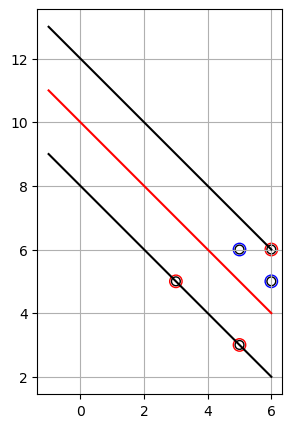

Margin size:  1.4142198090136668
Support vectors:  [[3.0, 5.0, 1], [5.0, 3.0, 1], [6.0, 6.0, 1], [5.0, 6.0, -1], [6.0, 5.0, -1]]
The point [3, 4] belongs to class 1.
The point [3, 6] belongs to class 1.
The point [4, 3] belongs to class 1.
The point [4, 5] belongs to class 1.
The point [5, 4] belongs to class 1.
The point [5, 2] belongs to class 1.
The point [5, 6] belongs to class -1.
The point [6, 4] belongs to class 1.
The point [6, 7] belongs to class -1.
The point [7, 5] belongs to class -1.
The point [7, 6] belongs to class -1.


In [65]:
data = [[3.0, 5.0, 1], [5.0, 3.0, 1], [6.0, 6.0, 1], [5.0, 6.0, -1],[6.0,5.0, -1]]
svm_proc(data,C=1)